In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
  .appName('lab')\
  .getOrCreate()

In [6]:
df = spark.read.format("parquet").load("gs://cld-gcs/bqccd")
df.printSchema()

root
 |-- id: double (nullable = true)
 |-- limit_balance: double (nullable = true)
 |-- sex: string (nullable = true)
 |-- education_level: string (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- age: double (nullable = true)
 |-- pay_0: double (nullable = true)
 |-- pay_2: double (nullable = true)
 |-- pay_3: double (nullable = true)
 |-- pay_4: double (nullable = true)
 |-- pay_5: string (nullable = true)
 |-- pay_6: string (nullable = true)
 |-- bill_amt_1: double (nullable = true)
 |-- bill_amt_2: double (nullable = true)
 |-- bill_amt_3: double (nullable = true)
 |-- bill_amt_4: double (nullable = true)
 |-- bill_amt_5: double (nullable = true)
 |-- bill_amt_6: double (nullable = true)
 |-- pay_amt_1: double (nullable = true)
 |-- pay_amt_2: double (nullable = true)
 |-- pay_amt_3: double (nullable = true)
 |-- pay_amt_4: double (nullable = true)
 |-- pay_amt_5: double (nullable = true)
 |-- pay_amt_6: double (nullable = true)
 |-- default_payment_next_month: 

In [27]:
df.registerTempTable("df")
mdf = spark.sql("select age, percentile_approx(limit_balance, 0.5) as mlimit_balance from df group by age order by age")
mdf.show()

+----+--------------+
| age|mlimit_balance|
+----+--------------+
|21.0|       20000.0|
|22.0|       30000.0|
|23.0|       50000.0|
|24.0|       50000.0|
|25.0|       70000.0|
|26.0|      110000.0|
|27.0|      140000.0|
|28.0|      150000.0|
|29.0|      140000.0|
|30.0|      180000.0|
|31.0|      170000.0|
|32.0|      160000.0|
|33.0|      200000.0|
|34.0|      170000.0|
|35.0|      160000.0|
|36.0|      200000.0|
|37.0|      170000.0|
|38.0|      180000.0|
|39.0|      200000.0|
|40.0|      160000.0|
+----+--------------+
only showing top 20 rows



In [28]:
pdf = mdf.toPandas()
pdf

,age,mlimit_balance
0,21.0,20000.0
1,22.0,30000.0
2,23.0,50000.0
3,24.0,50000.0
4,25.0,70000.0
5,26.0,110000.0
6,27.0,140000.0
7,28.0,150000.0
8,29.0,140000.0
9,30.0,180000.0


<AxesSubplot:xlabel='age'>

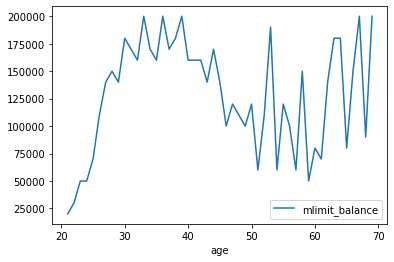

In [29]:
pdf.plot("age", "mlimit_balance")